In [1]:
import pandas as pd
import os
import seaborn as sns

In [32]:
df = pd.read_csv(os.path.join("./spreadsheets", "physio_clinical_cxr_meta.csv"))

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,...,age,sbp_discrete,dbp_discrete,o2sat_discrete,resprate_discrete,heartrate_discrete,temperature_discrete,age_discrete,acuity_discrete,split
0,0,0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,...,52,"(90,140)","(60,90)",>=95,"[12,18)","[60,100)","[97,99)",<65,3.0,test
1,1,2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,...,52,"(90,140)","(60,90)",>=95,>=18,"[60,100)","[97,99)",<65,3.0,train
2,2,6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,CHEST (PORTABLE AP),AP,3056,2544,21800805,...,52,"(90,140)",<=60,>=95,>=18,>=100,"[99,100.4)",<65,3.0,train
3,3,17,9b314ad7-fbcb0422-6db62dfc-732858d0-a5527d8b,10000935,51178377,CHEST (PA AND LAT),AP,3056,2544,21870823,...,57,"(90,140)","(60,90)",>=95,>=18,>=100,"[97,99)",<65,3.0,test
4,4,20,8e3f2822-0c1d4b71-2a265bbf-5b96e531-ccf5fa30,10000935,56164612,CHEST (PA AND LAT),AP,2544,3056,21870711,...,57,"(90,140)","(60,90)",>=95,>=18,>=100,"[97,99)",<65,3.0,train


In [4]:
# Let's do the numerical first.
clinical_cols = [
    "temperature",
    "heartrate",
    "resprate",
    "o2sat",
    "sbp",
    "dbp",
    "acuity",
    # "chiefcomplaint",
    "age",
]


In [5]:
df['temperature_discrete'] = pd.Categorical(df['temperature_discrete'], categories = ["<97", "[97,99)", "[99,100.4)",  ">=100.4"] , ordered = True)

<Axes: xlabel='temperature', ylabel='Count'>

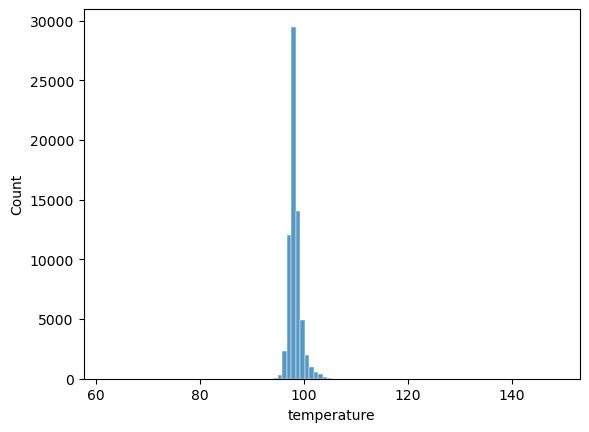

In [6]:
sns.histplot(data=df, x='temperature', edgecolor='#FFF', bins=100)


<Axes: xlabel='temperature', ylabel='Count'>

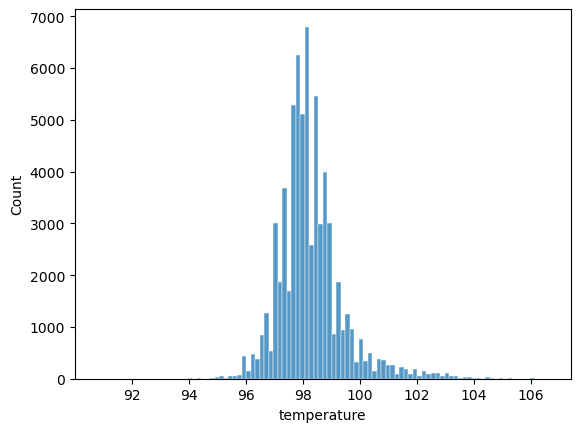

In [7]:
sns.histplot(data=df[(df['temperature']>90) & (df['temperature']<110)], x='temperature', edgecolor='#FFF', bins=100)

<Axes: xlabel='temperature_discrete', ylabel='Count'>

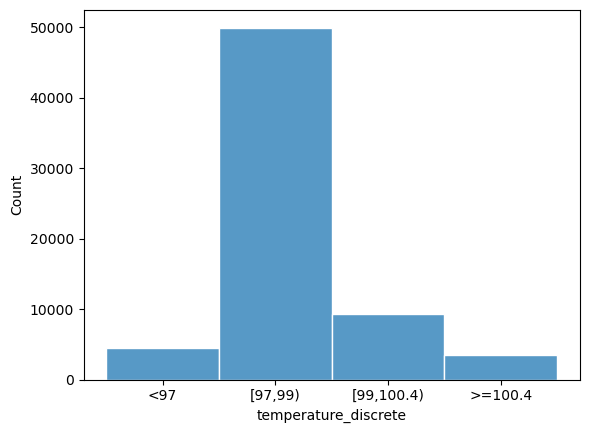

In [8]:

sns.histplot(data=df, x='temperature_discrete', edgecolor='#FFF')

In [10]:
df['heartrate_discrete'] = pd.Categorical(df['heartrate_discrete'], categories = ["<60", "[60,100)", ">=100"] , ordered = True)

<Axes: xlabel='heartrate', ylabel='Count'>

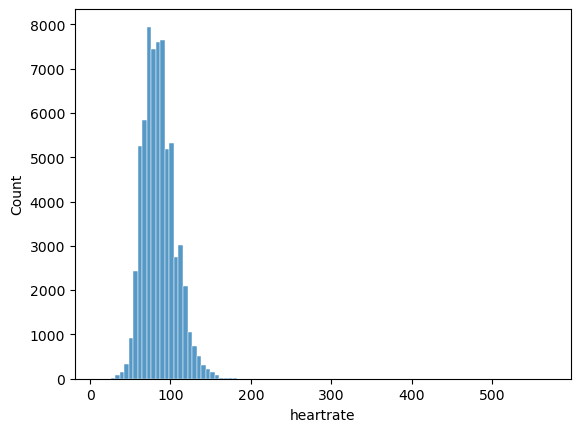

In [11]:
sns.histplot(data=df, x='heartrate', edgecolor='#FFF', bins=100)


<Axes: xlabel='heartrate', ylabel='Count'>

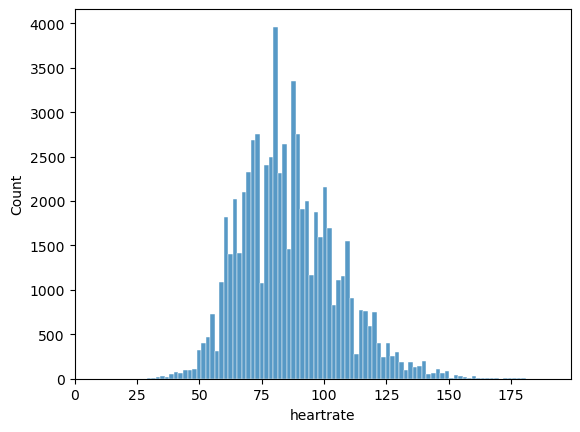

In [14]:
sns.histplot(data=df[(df['heartrate']>0) & (df['heartrate']<200)], x='heartrate', edgecolor='#FFF', bins=100)

<Axes: xlabel='heartrate_discrete', ylabel='Count'>

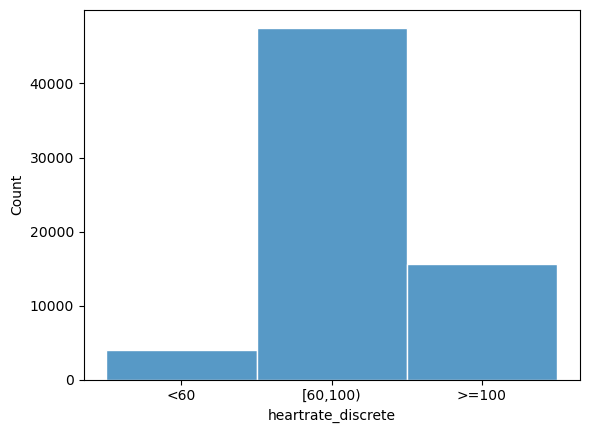

In [13]:
sns.histplot(data=df, x='heartrate_discrete', edgecolor='#FFF')


In [ ]:
# df['resprate_discrete'].value_counts()
# df['resprate_discrete'] = pd.Categorical(df['resprate_discrete'], categories = ["<60", "[60,100)", ">=100"] , ordered = True)
# sns.histplot(data=df, x='resprate', edgecolor='#FFF', bins=20)
# sns.histplot(data=df[(df['resprate']>0) & (df['resprate']<200)], x='resprate', edgecolor='#FFF', bins=20)
# sns.histplot(data=df, x='resprate_discrete', edgecolor='#FFF')

In [16]:
# df['resprate_discrete'].value_counts()
df['resprate_discrete'] = pd.Categorical(df['resprate_discrete'], categories = ["<12", "[12,18)", ">=18"] , ordered = True)


<Axes: xlabel='resprate', ylabel='Count'>

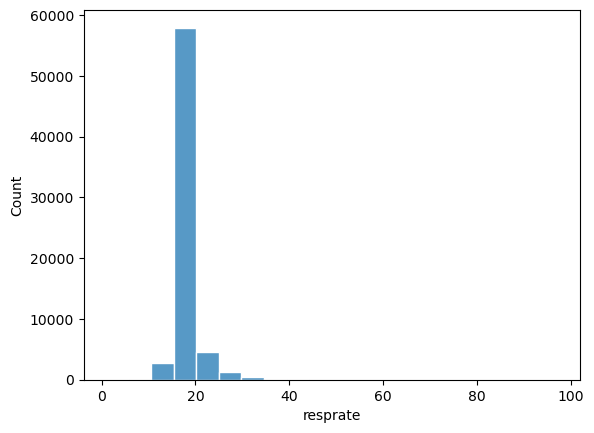

In [24]:
sns.histplot(data=df, x='resprate', edgecolor='#FFF', bins=20)


<Axes: xlabel='resprate', ylabel='Count'>

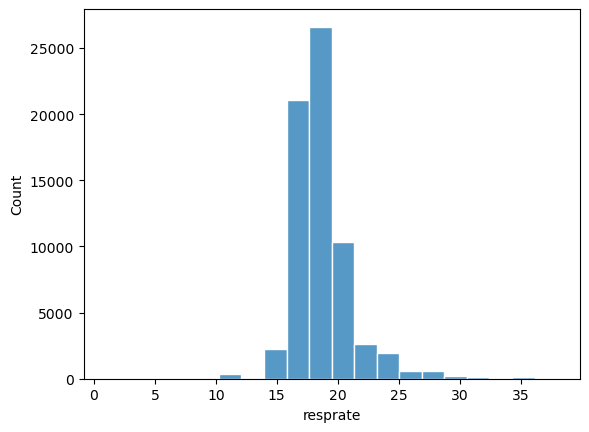

In [23]:
sns.histplot(data=df[(df['resprate']>0) & (df['resprate']<40)], x='resprate', edgecolor='#FFF', bins=20)

<Axes: xlabel='resprate_discrete', ylabel='Count'>

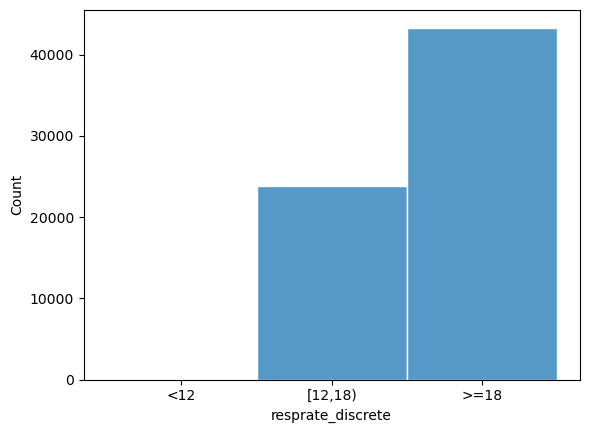

In [19]:
sns.histplot(data=df, x='resprate_discrete', edgecolor='#FFF')

In [37]:
# df['o2sat_discrete'].value_counts()
df['o2sat_discrete'] = pd.Categorical(df['o2sat_discrete'], categories = ["<=80", "(80,90)","[90,95)", ">=95"] , ordered = True)


In [31]:
df["o2sat"].max()

1001.0

<Axes: xlabel='o2sat', ylabel='Count'>

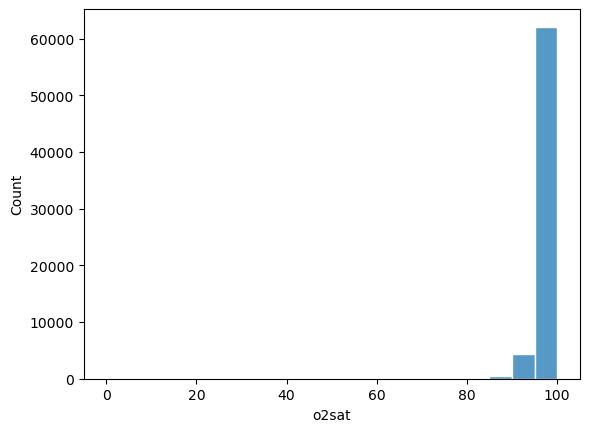

In [45]:
sns.histplot(data=df, x='o2sat', edgecolor='#FFF', bins=20)


<Axes: xlabel='o2sat', ylabel='Count'>

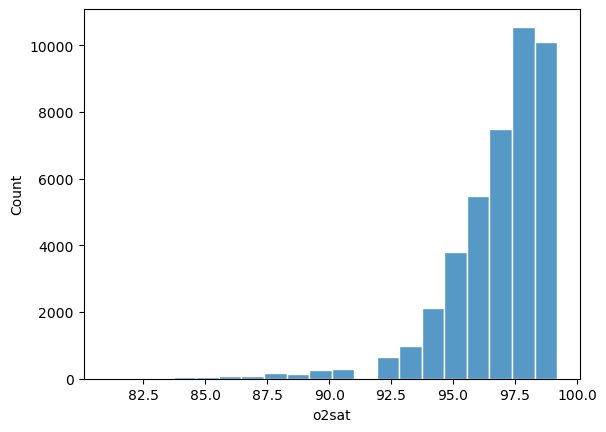

In [35]:
sns.histplot(data=df[(df['o2sat']>80) & (df['o2sat']<100)], x='o2sat', edgecolor='#FFF', bins=20)


<Axes: xlabel='o2sat_discrete', ylabel='Count'>

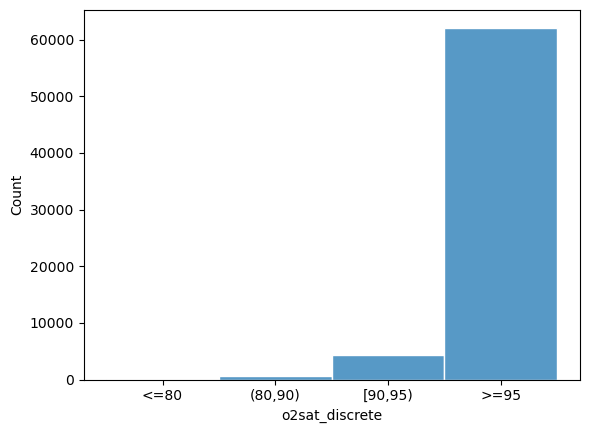

In [38]:
sns.histplot(data=df, x='o2sat_discrete', edgecolor='#FFF')

In [40]:
# df['sbp_discrete'].value_counts()
df['sbp_discrete'] = pd.Categorical(df['sbp_discrete'], categories = ["<=90", "(90,140)", ">=140"] , ordered = True)

<Axes: xlabel='sbp', ylabel='Count'>

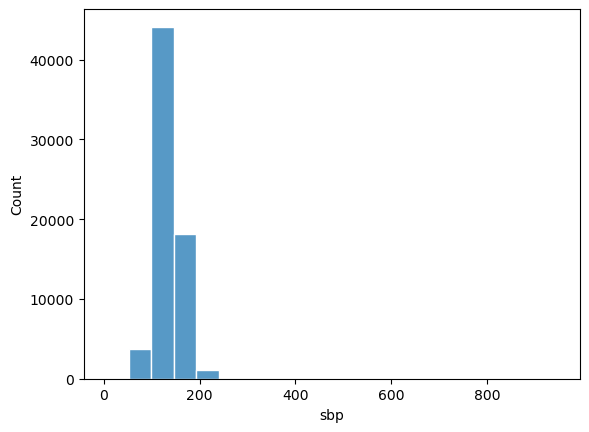

In [47]:
sns.histplot(data=df[df['sbp']<1000], x='sbp', edgecolor='#FFF', bins=20)


<Axes: xlabel='sbp', ylabel='Count'>

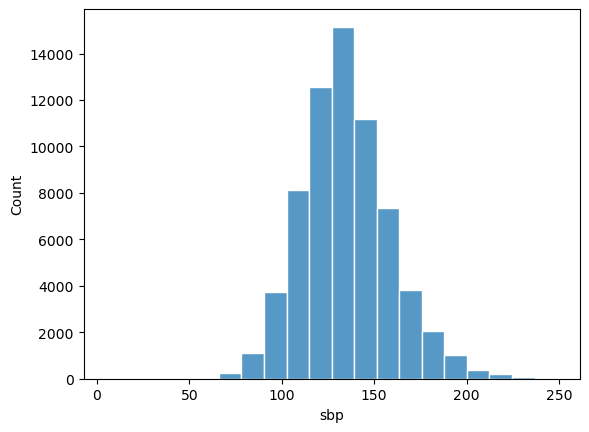

In [49]:
sns.histplot(data=df[(df['sbp']>0) & (df['sbp']<250)], x='sbp', edgecolor='#FFF', bins=20)

<Axes: xlabel='sbp_discrete', ylabel='Count'>

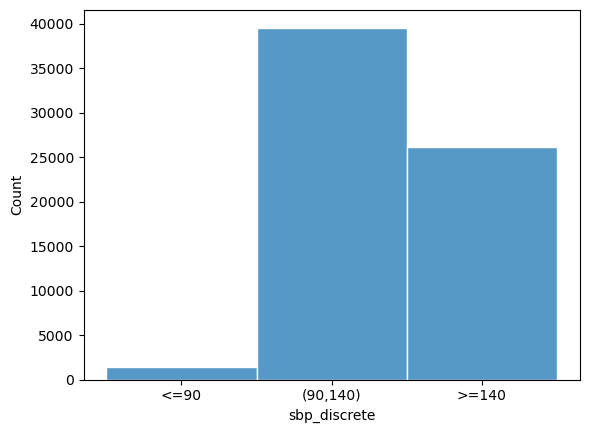

In [50]:
sns.histplot(data=df, x='sbp_discrete', edgecolor='#FFF')

In [53]:
# df['dbp_discrete'].value_counts()
df['dbp_discrete'] = pd.Categorical(df['dbp_discrete'], categories = ["<=60", "(60,90)", ">=90"] , ordered = True)


In [ ]:
merged_df =  merged_df[merged_df['dbp'] <= 10000]

<Axes: xlabel='dbp', ylabel='Count'>

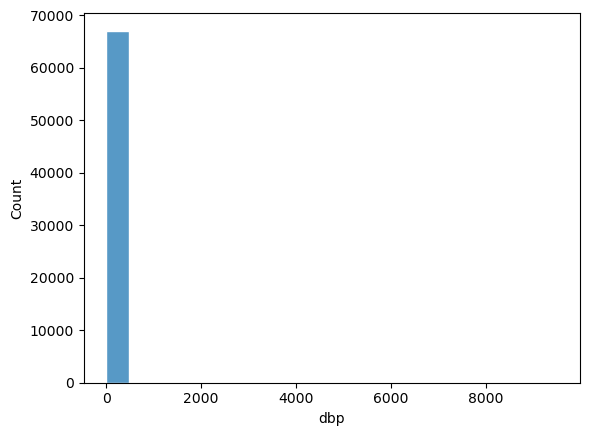

In [60]:
sns.histplot(data=df[df['dbp'] <= 10000], x='dbp', edgecolor='#FFF', bins=20)
# sns.histplot(data=df[(df['dbp']>0) & (df['dbp']<200)], x='dbp', edgecolor='#FFF', bins=20)
# sns.histplot(data=df, x='dbp_discrete', edgecolor='#FFF')

<Axes: xlabel='dbp', ylabel='Count'>

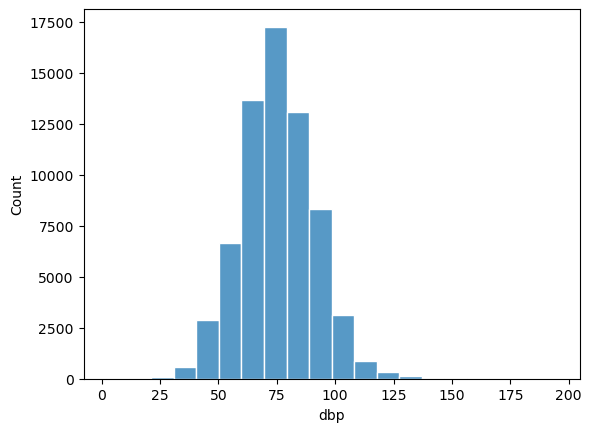

In [61]:
sns.histplot(data=df[(df['dbp']>0) & (df['dbp']<200)], x='dbp', edgecolor='#FFF', bins=20)
# sns.histplot(data=df, x='dbp_discrete', edgecolor='#FFF')

<Axes: xlabel='dbp_discrete', ylabel='Count'>

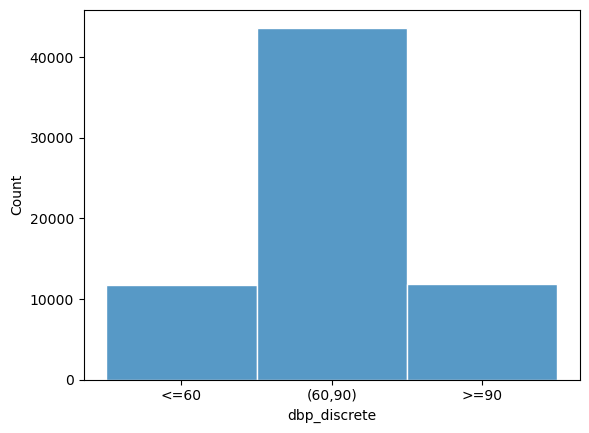

In [62]:
sns.histplot(data=df, x='dbp_discrete', edgecolor='#FFF')

In [ ]:
# df['resprate_discrete'].value_counts()
# df['resprate'].nlargest(40)
# df['resprate_discrete'] = pd.Categorical(df['resprate_discrete'], categories = ["<60", "[60,100)", ">=100"] , ordered = True)
# sns.histplot(data=df, x='resprate', edgecolor='#FFF', bins=20)
# sns.histplot(data=df[(df['resprate']>0) & (df['resprate']<200)], x='resprate', edgecolor='#FFF', bins=20)
# sns.histplot(data=df, x='resprate_discrete', edgecolor='#FFF')